In [59]:
import pandas as pd
import re, string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lizal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lizal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lizal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [62]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [63]:
drop = ['id', 'location']
train = train.drop(drop, axis=1)
train.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
def preparation (text): 
    text = text.lower() 
    text=text.strip()
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
 
    text=re.compile('<.*?>').sub('', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+',' ',text)
    text = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(text)

wl = WordNetLemmatizer()
 
def postag (tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(text):
    text = nltk.pos_tag(word_tokenize(text)) 
    text =[wl.lemmatize(tag[0], postag(tag[1])) for idx, tag in enumerate(text)] 
    return " ".join(text)
    


In [65]:
train['clean_text'] = train['text'].apply(preparation)
train['clean_text'] = train['clean_text'].apply(lemmatizer)
train

,keyword,text,target,clean_text
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fires cali...
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [66]:
train = train.drop('text', axis=1)
train

,keyword,target,clean_text
0,NaN,1,deeds reason earthquake may allah forgive us
1,NaN,1,forest fire near la ronge sask canada
2,NaN,1,residents asked shelter place notified officer...
3,NaN,1,13000 people receive wildfires evacuation orde...
4,NaN,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...
7608,NaN,1,two giant cranes holding bridge collapse nearb...
7609,NaN,1,ariaahrary thetawniest control wild fires cali...
7610,NaN,1,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,NaN,1,police investigating ebike collided car little...


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train["clean_text"],train["target"],test_size = 0.2,random_state = 10)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_BOW = vectorizer.fit_transform(X_train)
X_test_BOW = vectorizer.transform(X_test)

In [69]:
X_train_BOW

<6090x18984 sparse matrix of type '<class 'numpy.int64'>'
	with 58841 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer( ngram_range=(1,2))
X_train_TFIDF = vectorizer1.fit_transform(X_train)
X_test_TFIDF = vectorizer1.transform(X_test)

# Линейная регрессия

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regr_BOW = LinearRegression()
regr_BOW.fit(X_train_BOW, y_train)

regr_TFIDF = LinearRegression()
regr_TFIDF.fit(X_train_TFIDF, y_train)

LinearRegression()

In [73]:
y_predict_BOW = regr_BOW.predict(X_test_BOW)
y_predict_BOW = y_predict_BOW.round()
y_predict_TFIDF = regr_TFIDF.predict(X_test_TFIDF)
y_predict_TFIDF = y_predict_TFIDF.round()


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_predict_BOW, y_test)

0.7334208798424163

In [76]:
accuracy_score(y_predict_TFIDF, y_test)

0.7820091923834537

# Метод опорных векторов

In [77]:
from sklearn.svm import SVC

In [78]:
svc_BOW = SVC()
svc_BOW.fit(X_train_BOW, y_train)
y_predict_BOW = svc_BOW.predict(X_test_BOW)
accuracy_score(y_predict_BOW, y_test)

0.793827971109652

In [79]:
svc_TFIDF = SVC()
svc_TFIDF.fit(X_train_TFIDF, y_train)
y_predict_TFIDF = svc_TFIDF.predict(X_test_TFIDF)
accuracy_score(y_predict_TFIDF, y_test)


0.7898883782009193

# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier


In [81]:
knn_BOW = KNeighborsClassifier(n_neighbors = 3)
knn_BOW.fit(X_train_BOW, y_train)
y_predict_BOW = knn_BOW.predict(X_test_BOW)
accuracy_score(y_predict_BOW, y_test)

0.6933683519369666

In [82]:
import matplotlib.pyplot as plt

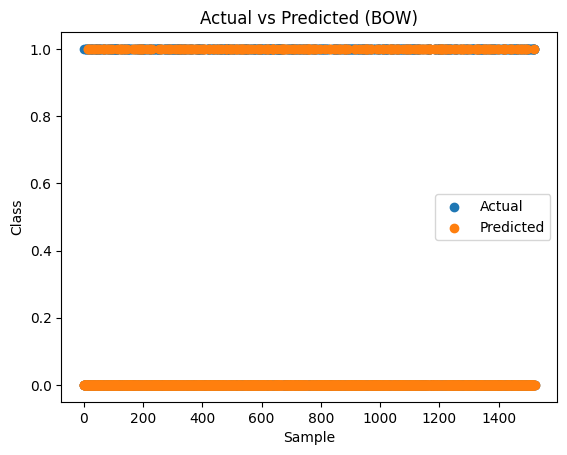

In [83]:
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_test)), y_predict_BOW, label='Predicted')

plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted (BOW)')
plt.legend()
plt.show()

In [84]:
knn_TFIDF =  KNeighborsClassifier(n_neighbors = 15)
knn_TFIDF.fit(X_train_TFIDF, y_train)
y_predict_TFIDF = knn_TFIDF.predict(X_test_TFIDF)
accuracy_score(y_predict_TFIDF, y_test)


0.7715036112934996

# Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
tree_BOW = DecisionTreeClassifier()
tree_BOW.fit(X_train_BOW, y_train)
y_predict_BOW = tree_BOW.predict(X_test_BOW)
accuracy_score(y_predict_BOW, y_test)

0.7636244254760342

In [87]:
tree_TFIDF =  DecisionTreeClassifier()
tree_TFIDF.fit(X_train_TFIDF, y_train)
y_predict_TFIDF = tree_TFIDF.predict(X_test_TFIDF)
accuracy_score(y_predict_TFIDF, y_test)

0.7275114904793172